In [1]:
import numpy as np
import pandas as pd
import datetime as dt

##  Skills dataset contains total 67760 entries, with unique occupations equal to 968, and different number of skills equal to 35. Each skill for a given occupation is represented twice as Level(Lvl) and  Importance(IM) rating.  Thus total number of entries equals 35\*2\*968= 6770

In [2]:
df = pd.read_excel('on_net/Skills.xlsx')

In [3]:
print('Total number of data points', len(df))

Total number of data points 67760


In [4]:
df.head()

,O*NET-SOC Code,Title,Element ID,Element Name,Scale ID,Scale Name,Data Value,N,Standard Error,Lower CI Bound,Upper CI Bound,Recommend Suppress,Not Relevant,Date,Domain Source
0,11-1011.00,Chief Executives,2.A.1.a,Reading Comprehension,IM,Importance,4.12,8.0,0.13,3.88,4.37,N,NaN,07/2014,Analyst
1,11-1011.00,Chief Executives,2.A.1.a,Reading Comprehension,LV,Level,4.75,8.0,0.16,4.43,5.07,N,N,07/2014,Analyst
2,11-1011.00,Chief Executives,2.A.1.b,Active Listening,IM,Importance,4.12,8.0,0.13,3.88,4.37,N,NaN,07/2014,Analyst
3,11-1011.00,Chief Executives,2.A.1.b,Active Listening,LV,Level,4.88,8.0,0.23,4.43,5.32,N,N,07/2014,Analyst
4,11-1011.00,Chief Executives,2.A.1.c,Writing,IM,Importance,4.00,8.0,0.00,4.00,4.00,N,NaN,07/2014,Analyst


#### Occupations are the different types of occupations in the dataset.
#### Total number of unique occupations in the dataset is 968

In [5]:
occupation = df.groupby('Title').nunique().index
occupation

Index(['Accountants', 'Actors', 'Actuaries', 'Acupuncturists',
       'Acute Care Nurses', 'Adapted Physical Education Specialists',
       'Adhesive Bonding Machine Operators and Tenders',
       'Administrative Law Judges, Adjudicators, and Hearing Officers',
       'Administrative Services Managers',
       'Adult Basic and Secondary Education and Literacy Teachers and Instructors',
       ...
       'Welding, Soldering, and Brazing Machine Setters, Operators, and Tenders',
       'Wellhead Pumpers', 'Wholesale and Retail Buyers, Except Farm Products',
       'Wind Energy Engineers', 'Wind Energy Operations Managers',
       'Wind Energy Project Managers', 'Wind Turbine Service Technicians',
       'Woodworking Machine Setters, Operators, and Tenders, Except Sawing',
       'Word Processors and Typists', 'Zoologists and Wildlife Biologists'],
      dtype='object', name='Title', length=968)

In [6]:
print('Total number of unique occupation is equal to', len(occupation))

Total number of unique occupation is equal to 968


## Skills and Ratings

 Each value in the 'Element Name' column is the skill associated with the corresponding Occupation.  <br>
 In total there are 35 unique skills corresponding to each occupation.<br>
 Each skill has two rating Lvl(Level) and Importance rating (IM).<br>
 The entries for different occupations in the database is not for the same years. That is some occupations have  entries for a given year while others have entry for another year. Some occupations maybe have etries for the same year as well.

In [7]:
c = []
for i in occupation:
    c.append(df[df['Title']==i]['Date'].unique())

In [8]:
df.groupby('Title')['Date'].unique()

Title
Accountants                                                           [08/2018]
Actors                                                                [07/2017]
Actuaries                                                             [07/2017]
Acupuncturists                                                        [07/2011]
Acute Care Nurses                                                     [07/2014]
                                                                        ...    
Wind Energy Project Managers                                          [07/2016]
Wind Turbine Service Technicians                                      [07/2013]
Woodworking Machine Setters, Operators, and Tenders, Except Sawing    [07/2015]
Word Processors and Typists                                           [07/2017]
Zoologists and Wildlife Biologists                                    [08/2018]
Name: Date, Length: 968, dtype: object

## Skill Level and Importance Description

 Importance rating or IM: 1 <= IM =< 5 <br>
 IM = { 1 =  Not Important<br>
 &emsp;&ensp;&ensp;&ensp; 2 = Somewhat Important<br>
 &emsp;&ensp;&ensp;&ensp; 3 = Important<br>
 &emsp;&ensp;&ensp;&ensp; 4 = Very Important<br>
 &emsp;&ensp;&ensp;&ensp; 5 = Extremely Important }<br><br>
 Level rating or LVL: 1 = LVL =< 7, if IM >= 2;<br>
 &emsp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; ### and  LVL = 0; if   IM = 1

## Removing entries with skill level < 2:

1. Create a new dataset with these values and scale the importance between 0 and 1.
2. Then calculate RCA

In [9]:
## Changing scale from 1-5 to 0-1

def scaler(x):
    fx = (x['Data Value']-1)/4
    return fx

In [10]:
df1 = df[(df['Scale ID'] == 'IM') & (df['Data Value']>2)]
df1

,O*NET-SOC Code,Title,Element ID,Element Name,Scale ID,Scale Name,Data Value,N,Standard Error,Lower CI Bound,Upper CI Bound,Recommend Suppress,Not Relevant,Date,Domain Source
0,11-1011.00,Chief Executives,2.A.1.a,Reading Comprehension,IM,Importance,4.12,8.0,0.13,3.88,4.37,N,NaN,07/2014,Analyst
2,11-1011.00,Chief Executives,2.A.1.b,Active Listening,IM,Importance,4.12,8.0,0.13,3.88,4.37,N,NaN,07/2014,Analyst
4,11-1011.00,Chief Executives,2.A.1.c,Writing,IM,Importance,4.00,8.0,0.00,4.00,4.00,N,NaN,07/2014,Analyst
6,11-1011.00,Chief Executives,2.A.1.d,Speaking,IM,Importance,4.38,8.0,0.18,4.02,4.73,N,NaN,07/2014,Analyst
8,11-1011.00,Chief Executives,2.A.1.e,Mathematics,IM,Importance,3.25,8.0,0.16,2.93,3.57,N,NaN,07/2014,Analyst
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67746,53-7121.00,"Tank Car, Truck, and Ship Loaders",2.B.4.e,Judgment and Decision Making,IM,Importance,2.88,8.0,0.13,2.63,3.12,N,NaN,08/2019,Analyst
67748,53-7121.00,"Tank Car, Truck, and Ship Loaders",2.B.4.g,Systems Analysis,IM,Importance,2.50,8.0,0.19,2.13,2.87,N,NaN,08/2019,Analyst
67750,53-7121.00,"Tank Car, Truck, and Ship Loaders",2.B.4.h,Systems Evaluation,IM,Importance,2.12,8.0,0.13,1.88,2.37,N,NaN,08/2019,Analyst
67752,53-7121.00,"Tank Car, Truck, and Ship Loaders",2.B.5.a,Time Management,IM,Importance,3.12,8.0,0.13,2.88,3.37,N,NaN,08/2019,Analyst


In [11]:
df1['Title'].nunique()

968

In [12]:
type(df1)

pandas.core.frame.DataFrame

In [13]:
#df1.reset_index(drop=True, inplace=True)
del df1['O*NET-SOC Code']
df1.head()

,Title,Element ID,Element Name,Scale ID,Scale Name,Data Value,N,Standard Error,Lower CI Bound,Upper CI Bound,Recommend Suppress,Not Relevant,Date,Domain Source
0,Chief Executives,2.A.1.a,Reading Comprehension,IM,Importance,4.12,8.0,0.13,3.88,4.37,N,NaN,07/2014,Analyst
2,Chief Executives,2.A.1.b,Active Listening,IM,Importance,4.12,8.0,0.13,3.88,4.37,N,NaN,07/2014,Analyst
4,Chief Executives,2.A.1.c,Writing,IM,Importance,4.00,8.0,0.00,4.00,4.00,N,NaN,07/2014,Analyst
6,Chief Executives,2.A.1.d,Speaking,IM,Importance,4.38,8.0,0.18,4.02,4.73,N,NaN,07/2014,Analyst
8,Chief Executives,2.A.1.e,Mathematics,IM,Importance,3.25,8.0,0.16,2.93,3.57,N,NaN,07/2014,Analyst


In [14]:
df1.columns

Index(['Title', 'Element ID', 'Element Name', 'Scale ID', 'Scale Name',
       'Data Value', 'N', 'Standard Error', 'Lower CI Bound', 'Upper CI Bound',
       'Recommend Suppress', 'Not Relevant', 'Date', 'Domain Source'],
      dtype='object')

In [15]:
df1['scaled IM'] = df1.apply(scaler, axis=1)

/home/azlaan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
print(df1['scaled IM'].min())
print(df1['scaled IM'].max())   

0.28
1.0


### Revealed Comparitive Advantage (RCA)

In [17]:
df1.set_index(['Title', 'Element Name'], inplace=True)

In [18]:
df1

Element ID  \
Title                             Element Name                                   
Chief Executives                  Reading Comprehension                2.A.1.a   
                                  Active Listening                     2.A.1.b   
                                  Writing                              2.A.1.c   
                                  Speaking                             2.A.1.d   
                                  Mathematics                          2.A.1.e   
...                                                                        ...   
Tank Car, Truck, and Ship Loaders Judgment and Decision Making         2.B.4.e   
                                  Systems Analysis                     2.B.4.g   
                                  Systems Evaluation                   2.B.4.h   
                                  Time Management                      2.B.5.a   
                                  Management of Personnel Resources    2.B.5.d   

                                                                    Scale ID  \
Title                             Element Name                                 
Chief Executives                  Reading Comprehension                   IM   
                                  Active Listening                        IM   
                                  Writing                                 IM   
                                  Speaking                                IM   
                                  Mathematics                             IM   
...                                                                      ...   
Tank Car, Truck, and Ship Loaders Judgment and Decision Making            IM   
                                  Systems Analysis                        IM   
                                  Systems Evaluation                      IM   
                                  Time Management                         IM   
                                  Management of Personnel Resources       IM   

                                                                     Scale Name  \
Title                             Element Name                                    
Chief Executives                  Reading Comprehension              Importance   
                                  Active Listening                   Importance   
                                  Writing                            Importance   
                                  Speaking                           Importance   
                                  Mathematics                        Importance   
...                                                                         ...   
Tank Car, Truck, and Ship Loaders Judgment and Decision Making       Importance   
                                  Systems Analysis                   Importance   
                                  Systems Evaluation                 Importance   
                                  Time Management                    Importance   
                                  Management of Personnel Resources  Importance   

                                                                     Data Value  \
Title                             Element Name                                    
Chief Executives                  Reading Comprehension                    4.12   
                                  Active Listening                         4.12   
                                  Writing                                  4.00   
                                  Speaking                                 4.38   
                                  Mathematics                              3.25   
...                                                                         ...   
Tank Car, Truck, and Ship Loaders Judgment and Decision Making             2.88   
                                  Systems Analysis                         2.50   
                                  Systems Evaluati

In [19]:
ind_skill_sum = df1['scaled IM'].sum(level=1)
# ind_skill_sum is a panda series
print(ind_skill_sum)

Element Name
Reading Comprehension                594.8075
Active Listening                     628.7450
Writing                              514.3425
Speaking                             613.9975
Mathematics                          331.4475
Critical Thinking                    611.4175
Active Learning                      504.4300
Learning Strategies                  407.5575
Monitoring                           555.9300
Social Perceptiveness                523.8150
Coordination                         514.8875
Persuasion                           408.1150
Negotiation                          363.4450
Instructing                          424.0850
Service Orientation                  458.0000
Complex Problem Solving              529.8950
Operations Analysis                  176.9750
Judgment and Decision Making         546.2600
Systems Analysis                     372.7250
Systems Evaluation                   349.7550
Time Management                      507.6225
Management of Financi

In [20]:
job_sum = df1['Data Value'].sum(level=0)
# C is a panda series
print(job_sum)

Title
Chief Executives                             94.96
Chief Sustainability Officers                87.25
General and Operations Managers              87.76
Advertising and Promotions Managers          80.35
Marketing Managers                           83.02
                                             ...  
Pump Operators, Except Wellhead Pumpers      81.42
Wellhead Pumpers                             61.85
Refuse and Recyclable Material Collectors    62.89
Mine Shuttle Car Operators                   40.86
Tank Car, Truck, and Ship Loaders            75.50
Name: Data Value, Length: 968, dtype: float64


In [21]:
df1.reset_index(inplace=True)
df1.head()

,Title,Element Name,Element ID,Scale ID,Scale Name,Data Value,N,Standard Error,Lower CI Bound,Upper CI Bound,Recommend Suppress,Not Relevant,Date,Domain Source,scaled IM
0,Chief Executives,Reading Comprehension,2.A.1.a,IM,Importance,4.12,8.0,0.13,3.88,4.37,N,NaN,07/2014,Analyst,0.7800
1,Chief Executives,Active Listening,2.A.1.b,IM,Importance,4.12,8.0,0.13,3.88,4.37,N,NaN,07/2014,Analyst,0.7800
2,Chief Executives,Writing,2.A.1.c,IM,Importance,4.00,8.0,0.00,4.00,4.00,N,NaN,07/2014,Analyst,0.7500
3,Chief Executives,Speaking,2.A.1.d,IM,Importance,4.38,8.0,0.18,4.02,4.73,N,NaN,07/2014,Analyst,0.8450
4,Chief Executives,Mathematics,2.A.1.e,IM,Importance,3.25,8.0,0.16,2.93,3.57,N,NaN,07/2014,Analyst,0.5625


### Calculating RCA:

In [23]:
def rca_calculator(row):
    num = row['scaled IM']/(job_sum[row['Title']] - row['scaled IM'])
    den = (df1[(df1['Title'] != row['Title']) & (df1['Element Name'] == row['Element Name'])]['scaled IM'].sum()
     / df1[(df1['Title'] != row['Title']) & (df1['Element Name'] != row['Element Name'])]['scaled IM'].sum())
    return num/den

df1['RCA(j,s)'] = df1.apply(rca_calculator, axis = 1)

/home/azlaan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [24]:
df1.head()

,Title,Element Name,Element ID,Scale ID,Scale Name,Data Value,N,Standard Error,Lower CI Bound,Upper CI Bound,Recommend Suppress,Not Relevant,Date,Domain Source,scaled IM,"RCA(j,s)"
0,Chief Executives,Reading Comprehension,2.A.1.a,IM,Importance,4.12,8.0,0.13,3.88,4.37,N,NaN,07/2014,Analyst,0.7800,0.162454
1,Chief Executives,Active Listening,2.A.1.b,IM,Importance,4.12,8.0,0.13,3.88,4.37,N,NaN,07/2014,Analyst,0.7800,0.153226
2,Chief Executives,Writing,2.A.1.c,IM,Importance,4.00,8.0,0.00,4.00,4.00,N,NaN,07/2014,Analyst,0.7500,0.181858
3,Chief Executives,Speaking,2.A.1.d,IM,Importance,4.38,8.0,0.18,4.02,4.73,N,NaN,07/2014,Analyst,0.8450,0.170340
4,Chief Executives,Mathematics,2.A.1.e,IM,Importance,3.25,8.0,0.16,2.93,3.57,N,NaN,07/2014,Analyst,0.5625,0.214577


In [211]:
df1['RCA(j,s)'].min()

0.07667203858753284

In [212]:
df1['RCA(j,s)'].max()

3.7806586230011847

In [25]:
def effective_skill_use(row):
    if row['RCA(j,s)'] > 1:
        return 1
    else:
        return 0

In [26]:
df1['es(j,s)'] = df1.apply(effective_skill_use, axis=1)
df1.head()

/home/azlaan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Title,Element Name,Element ID,Scale ID,Scale Name,Data Value,N,Standard Error,Lower CI Bound,Upper CI Bound,Recommend Suppress,Not Relevant,Date,Domain Source,scaled IM,"RCA(j,s)","es(j,s)"
0,Chief Executives,Reading Comprehension,2.A.1.a,IM,Importance,4.12,8.0,0.13,3.88,4.37,N,NaN,07/2014,Analyst,0.7800,0.162454,0
1,Chief Executives,Active Listening,2.A.1.b,IM,Importance,4.12,8.0,0.13,3.88,4.37,N,NaN,07/2014,Analyst,0.7800,0.153226,0
2,Chief Executives,Writing,2.A.1.c,IM,Importance,4.00,8.0,0.00,4.00,4.00,N,NaN,07/2014,Analyst,0.7500,0.181858,0
3,Chief Executives,Speaking,2.A.1.d,IM,Importance,4.38,8.0,0.18,4.02,4.73,N,NaN,07/2014,Analyst,0.8450,0.170340,0
4,Chief Executives,Mathematics,2.A.1.e,IM,Importance,3.25,8.0,0.16,2.93,3.57,N,NaN,07/2014,Analyst,0.5625,0.214577,0


In [27]:
print('Total skills with effective use', df1[df1['es(j,s)']==1].count()[0])
print('Total skills with non-effective use', df1[df1['es(j,s)']==0].count()[0])
print('Total number of unique values for e(j,s)', df1['es(j,s)'].unique())

Total skills with effective use 226
Total skills with non-effective use 23700
Total number of unique values for e(j,s) [0 1]


### Calculating Theta (Skill complementarity):

In [28]:
unique_skills = df1['Element Name'].unique()
unique_skills

array(['Reading Comprehension', 'Active Listening', 'Writing', 'Speaking',
       'Mathematics', 'Critical Thinking', 'Active Learning',
       'Learning Strategies', 'Monitoring', 'Social Perceptiveness',
       'Coordination', 'Persuasion', 'Negotiation', 'Instructing',
       'Service Orientation', 'Complex Problem Solving',
       'Operations Analysis', 'Judgment and Decision Making',
       'Systems Analysis', 'Systems Evaluation', 'Time Management',
       'Management of Financial Resources',
       'Management of Material Resources',
       'Management of Personnel Resources', 'Operation Monitoring',
       'Quality Control Analysis', 'Technology Design', 'Programming',
       'Troubleshooting', 'Operation and Control', 'Science',
       'Equipment Maintenance', 'Repairing', 'Equipment Selection',
       'Installation'], dtype=object)

In [29]:
len(unique_skills)

35

In [30]:
# Making combinations of skills
from itertools import combinations
skill_combo = []
for i in combinations(unique_skills, r=2):
    skill_combo.append(i)
skill_combo

[('Reading Comprehension', 'Active Listening'),
 ('Reading Comprehension', 'Writing'),
 ('Reading Comprehension', 'Speaking'),
 ('Reading Comprehension', 'Mathematics'),
 ('Reading Comprehension', 'Critical Thinking'),
 ('Reading Comprehension', 'Active Learning'),
 ('Reading Comprehension', 'Learning Strategies'),
 ('Reading Comprehension', 'Monitoring'),
 ('Reading Comprehension', 'Social Perceptiveness'),
 ('Reading Comprehension', 'Coordination'),
 ('Reading Comprehension', 'Persuasion'),
 ('Reading Comprehension', 'Negotiation'),
 ('Reading Comprehension', 'Instructing'),
 ('Reading Comprehension', 'Service Orientation'),
 ('Reading Comprehension', 'Complex Problem Solving'),
 ('Reading Comprehension', 'Operations Analysis'),
 ('Reading Comprehension', 'Judgment and Decision Making'),
 ('Reading Comprehension', 'Systems Analysis'),
 ('Reading Comprehension', 'Systems Evaluation'),
 ('Reading Comprehension', 'Time Management'),
 ('Reading Comprehension', 'Management of Financial Re

In [ ]:
# Iterating over the skills combination
theta = {}
i =0
for combo in skill_combo:
    s_1 = combo[0]
    s_2 = combo[1]
    num = 0
    print(num)
    #df1.set_index(['Title'], inplace=True)
    den = max(df1[df1['Element Name']==s_1]['es(j,s)'].sum(), 
              df1[df1['Element Name']==s_2]['es(j,s)'].sum())
    #df1.reset_index(inplace=True)
    for job in occupation:
        try:
            num += df1.loc[(df1['Title']==job) & (df1['Element Name']==s_1), 'es(j,s)'].values[0]*df1.loc[(df1['Title']==job) & (df1['Element Name']==s_2), 'es(j,s)'].values[0]
        except:
            print('No skill combination of ', s_1, s_2, 'found for the job', job)
            continue
    
    theta[str(s_1)+'_'+str(s_2)] = num/den

In [68]:
len(skill_combo)

595

In [69]:
theta

{'Reading Comprehension_Active Listening': nan,
 'Reading Comprehension_Writing': nan,
 'Reading Comprehension_Speaking': nan,
 'Reading Comprehension_Mathematics': nan,
 'Reading Comprehension_Critical Thinking': nan,
 'Reading Comprehension_Active Learning': nan,
 'Reading Comprehension_Learning Strategies': nan,
 'Reading Comprehension_Monitoring': nan,
 'Reading Comprehension_Social Perceptiveness': nan,
 'Reading Comprehension_Coordination': nan,
 'Reading Comprehension_Persuasion': nan,
 'Reading Comprehension_Negotiation': nan,
 'Reading Comprehension_Instructing': nan,
 'Reading Comprehension_Service Orientation': nan,
 'Reading Comprehension_Complex Problem Solving': nan,
 'Reading Comprehension_Operations Analysis': nan,
 'Reading Comprehension_Judgment and Decision Making': nan,
 'Reading Comprehension_Systems Analysis': nan,
 'Reading Comprehension_Systems Evaluation': nan,
 'Reading Comprehension_Time Management': nan,
 'Reading Comprehension_Management of Financial Resour

In [193]:
for keys in theta.keys():
    if theta[keys] >0:
        print(keys)

Technology Design_Programming
Technology Design_Equipment Selection
Technology Design_Installation
Programming_Equipment Selection
Programming_Installation


In [93]:
df1

,Title,Element Name,Element ID,Scale ID,Scale Name,Data Value,N,Standard Error,Lower CI Bound,Upper CI Bound,Recommend Suppress,Not Relevant,Date,Domain Source,scaled IM,"RCA(j,s)","es(j,s)"
0,Chief Executives,Reading Comprehension,2.A.1.a,IM,Importance,4.12,8.0,0.13,3.88,4.37,N,NaN,07/2014,Analyst,0.7800,0.162454,0
1,Chief Executives,Active Listening,2.A.1.b,IM,Importance,4.12,8.0,0.13,3.88,4.37,N,NaN,07/2014,Analyst,0.7800,0.153226,0
2,Chief Executives,Writing,2.A.1.c,IM,Importance,4.00,8.0,0.00,4.00,4.00,N,NaN,07/2014,Analyst,0.7500,0.181858,0
3,Chief Executives,Speaking,2.A.1.d,IM,Importance,4.38,8.0,0.18,4.02,4.73,N,NaN,07/2014,Analyst,0.8450,0.170340,0
4,Chief Executives,Mathematics,2.A.1.e,IM,Importance,3.25,8.0,0.16,2.93,3.57,N,NaN,07/2014,Analyst,0.5625,0.214577,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23921,"Tank Car, Truck, and Ship Loaders",Judgment and Decision Making,2.B.4.e,IM,Importance,2.88,8.0,0.13,2.63,3.12,N,NaN,08/2019,Analyst,0.4700,0.134351,0
23922,"Tank Car, Truck, and Ship Loaders",Systems Analysis,2.B.4.g,IM,Importance,2.50,8.0,0.19,2.13,2.87,N,NaN,08/2019,Analyst,0.3750,0.159252,0
23923,"Tank Car, Truck, and Ship Loaders",Systems Evaluation,2.B.4.h,IM,Importance,2.12,8.0,0.13,1.88,2.37,N,NaN,08/2019,Analyst,0.2800,0.126775,0
23924,"Tank Car, Truck, and Ship Loaders",Time Management,2.B.5.a,IM,Importance,3.12,8.0,0.13,2.88,3.37,N,NaN,08/2019,Analyst,0.5300,0.163733,0


In [82]:
mean_IM = df1['scaled IM'].mean()
std = df1['scaled IM'].std()
print(mean_IM, std)

#Chosen threshold for importance of a skill for an occupation = 0.3
df2 = df1[df1['scaled IM']>=0.3]

#df2.set_index('Title', inplace=True)
#.sort_values('scaled IM')

0.5125699030343559 0.13607579052294386


In [94]:
df2.head()

,Title,Element Name,Element ID,Scale ID,Scale Name,Data Value,N,Standard Error,Lower CI Bound,Upper CI Bound,Recommend Suppress,Not Relevant,Date,Domain Source,scaled IM,"RCA(j,s)","es(j,s)"
0,Chief Executives,Reading Comprehension,2.A.1.a,IM,Importance,4.12,8.0,0.13,3.88,4.37,N,NaN,07/2014,Analyst,0.7800,0.162454,0
1,Chief Executives,Active Listening,2.A.1.b,IM,Importance,4.12,8.0,0.13,3.88,4.37,N,NaN,07/2014,Analyst,0.7800,0.153226,0
2,Chief Executives,Writing,2.A.1.c,IM,Importance,4.00,8.0,0.00,4.00,4.00,N,NaN,07/2014,Analyst,0.7500,0.181858,0
3,Chief Executives,Speaking,2.A.1.d,IM,Importance,4.38,8.0,0.18,4.02,4.73,N,NaN,07/2014,Analyst,0.8450,0.170340,0
4,Chief Executives,Mathematics,2.A.1.e,IM,Importance,3.25,8.0,0.16,2.93,3.57,N,NaN,07/2014,Analyst,0.5625,0.214577,0


In [187]:
df2['scaled IM'].sum()

11882.6675

In [158]:
array = df2.pivot(index='Title', columns='Element Name', values='scaled IM')
array.fillna(0, inplace=True)
array = array.values
array

array([[0.53  , 0.72  , 0.5625, ..., 0.53  , 0.    , 0.655 ],
       [0.405 , 0.6875, 0.47  , ..., 0.5   , 0.    , 0.47  ],
       [0.595 , 0.75  , 0.75  , ..., 0.53  , 0.    , 0.595 ],
       ...,
       [0.375 , 0.47  , 0.4375, ..., 0.4375, 0.5   , 0.    ],
       [0.3125, 0.5625, 0.    , ..., 0.5   , 0.    , 0.5625],
       [0.6875, 0.75  , 0.6875, ..., 0.595 , 0.    , 0.72  ]])

In [163]:
array.shape

(968, 35)

### Occupation vs Skill matrix Plot (light colour = high importance, dark = low importance)

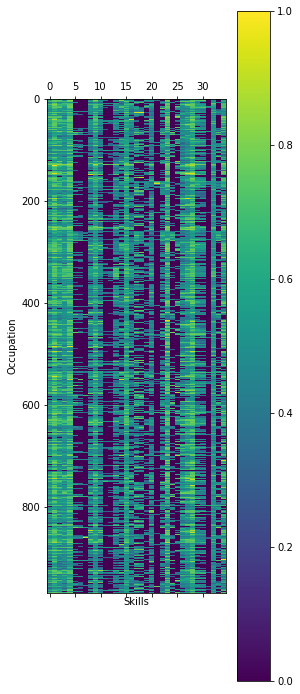

In [188]:
import numpy as np
import matplotlib.pyplot as plt
#plt.rcParams['figure.figsize'] = [100, 100]
#plt.figure(figsize=(50,50), dpi =500)
#sns.heatmap(array)
nums = []
for j in range(0,968): nums.append(j)
partial_matrix = array[nums, :] 

plt.matshow(partial_matrix)
plt.gca().set_aspect(0.1)
plt.colorbar()
plt.xlabel('Skills')
plt.ylabel('Occupation')
plt.show()

### Distribution of Importance of "Mathematics" skill for different occupation for Scaled IM > 0.5:

It is highest for jobs like Mathematician and Statistician.

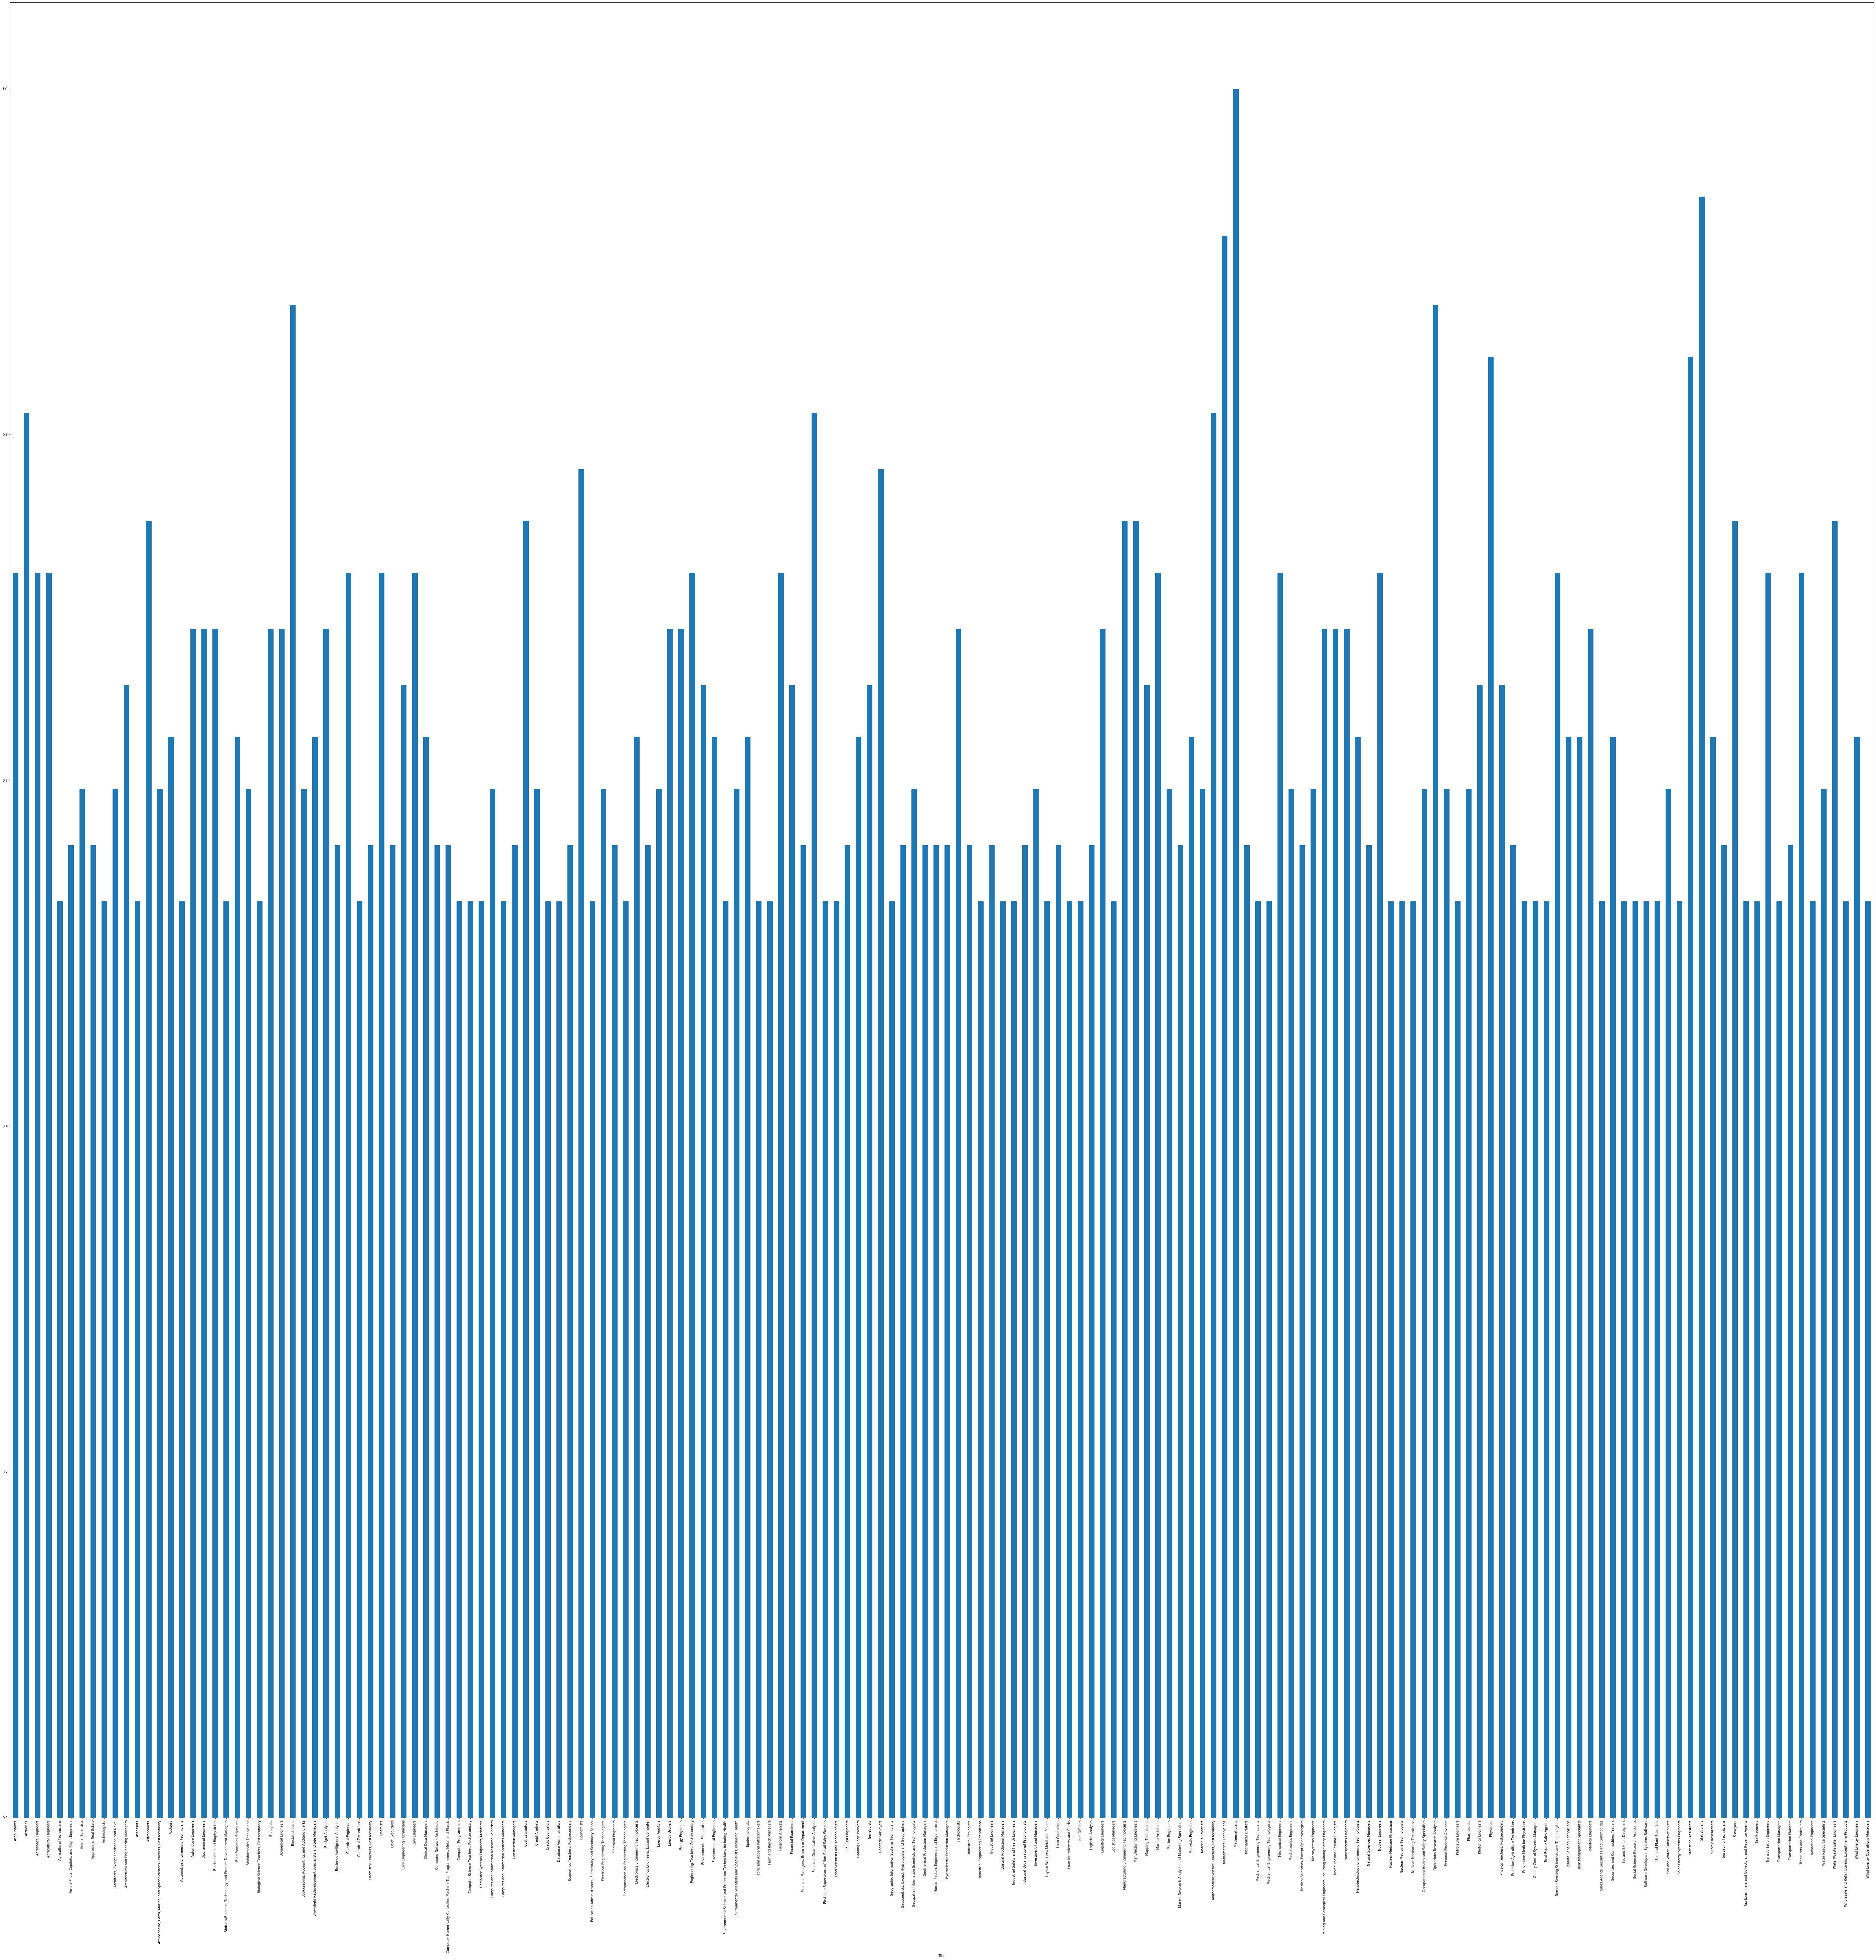

In [209]:
df4 = df2.pivot(index='Title', columns='Element Name', values='scaled IM')
df4 = df4['Mathematics']
df4[df4 >0.5].plot.bar()

### List of jobs where Mathetics skill is not required at all.

In [217]:
df5 = df4.fillna(0)
df5[df5==0].index

Index(['Actors', 'Adapted Physical Education Specialists',
       'Agricultural Equipment Operators', 'Airfield Operations Specialists',
       'Ambulance Drivers and Attendants, Except Emergency Medical Technicians',
       'Amusement and Recreation Attendants', 'Animal Breeders',
       'Animal Control Workers', 'Animal Trainers',
       'Arbitrators, Mediators, and Conciliators',
       ...
       'Transit and Railroad Police',
       'Transportation Attendants, Except Flight Attendants',
       'Transportation Security Screeners',
       'Transportation Vehicle, Equipment and Systems Inspectors, Except Aviation',
       'Tree Trimmers and Pruners',
       'Ushers, Lobby Attendants, and Ticket Takers', 'Waiters and Waitresses',
       'Watch Repairers', 'Web Administrators',
       'Wind Turbine Service Technicians'],
      dtype='object', name='Title', length=317)

### Distribution of Skills over Occupations

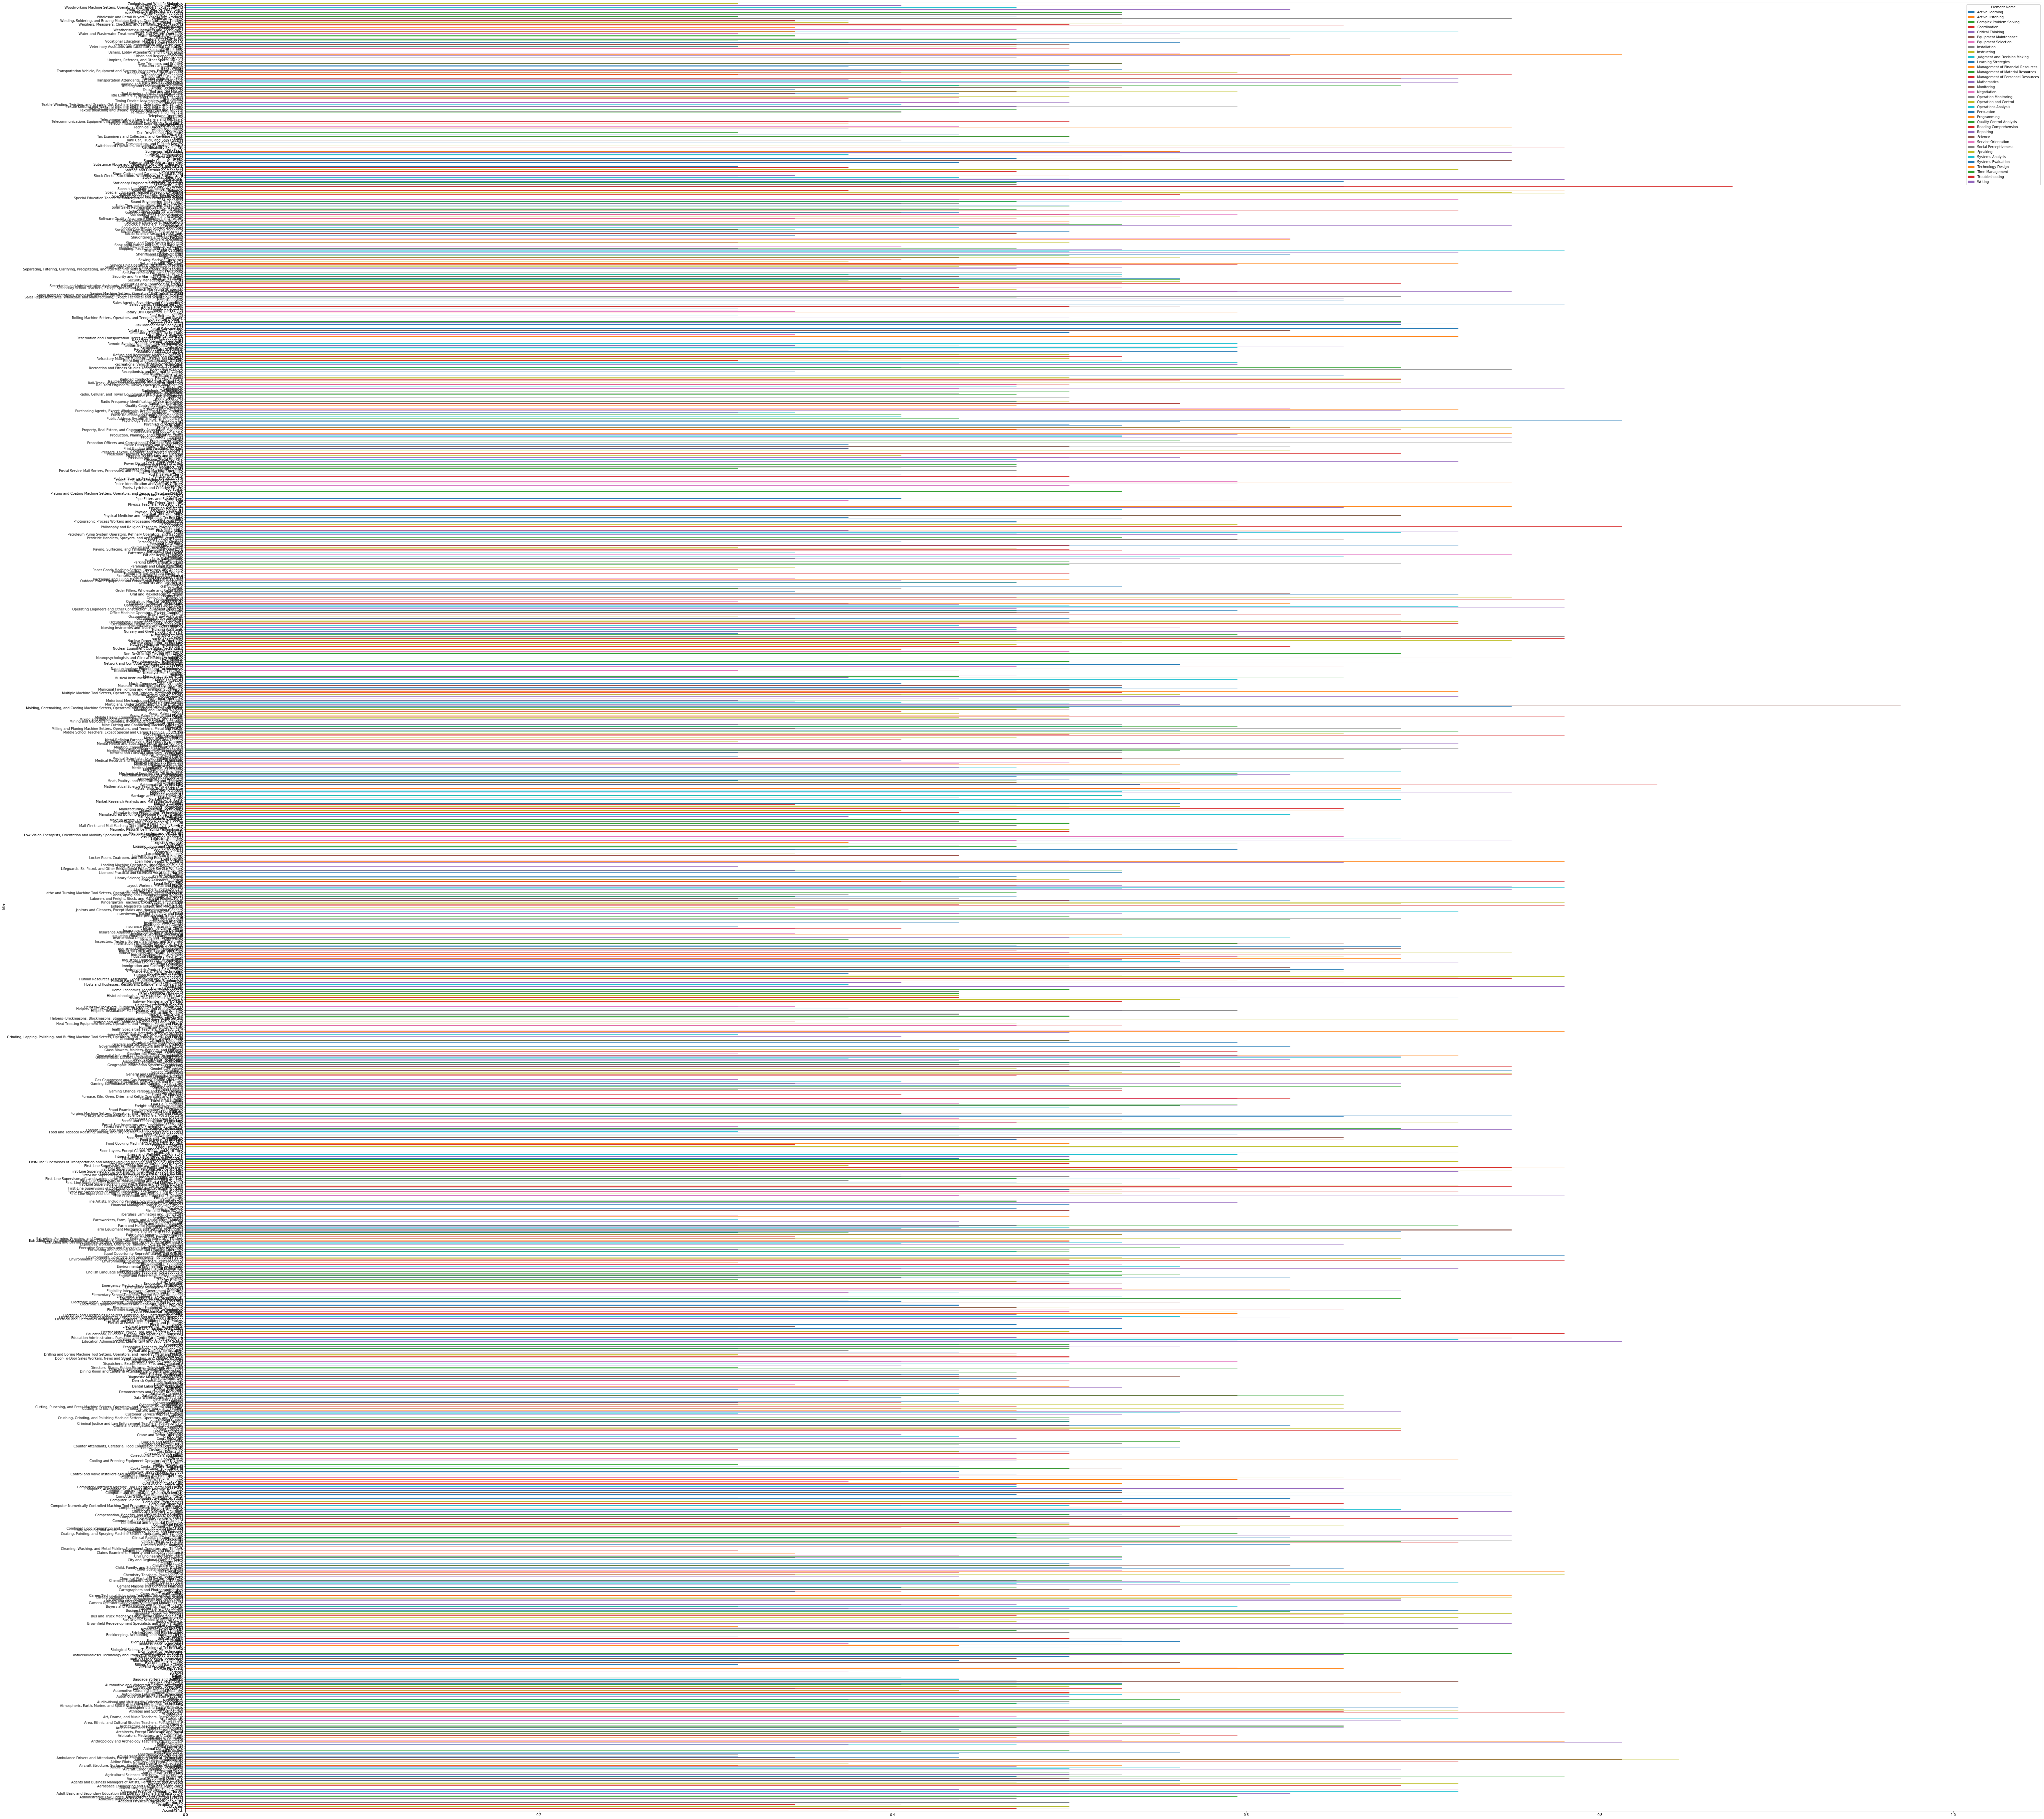

In [220]:
df5 = df2.pivot(index='Title', columns='Element Name', values='scaled IM')
df5.plot.barh()